<div style="text-align:center;">
  <span style="color:Black; font: timenewroman; font-size:24px; font-weight:bold; text-decoration:underline;">
    Bank Loan Approval Prediction using Machine Learning
  </span>
</div>

# Objective:
To predict whether a loan application should be approved or not based on user data like income, credit history, etc.


### Dataset Details:
Source: Bankloan.csv

Rows: 614

Columns: 13

Target Variable: Loan_Status (Y = Approved, N = Rejected)





| Feature            | Description                                       |
| ------------------ | ------------------------------------------------- |
| Loan\_ID           | Unique loan identifier                            |
| Gender             | Applicant gender (Male/Female)                    |
| Married            | Marital status                                    |
| Dependents         | No. of dependents                                 |
| Education          | Education level                                   |
| Self\_Employed     | Self-employed status                              |
| ApplicantIncome    | Applicant's income                                |
| CoapplicantIncome  | Co-applicant's income                             |
| LoanAmount         | Loan amount in thousands                          |
| Loan\_Amount\_Term | Loan repayment term (in days)                     |
| Credit\_History    | Credit history meets guidelines (1 = Yes, 0 = No) |
| Property\_Area     | Urban, Semiurban, Rural                           |
| Loan\_Status       | Target (Y/N)                                      |


# Import Required Libraries

In [50]:
# Importing necessary libraries for data analysis and visualization
import numpy as np # numerical operation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

# Ml libraries
from sklearn.model_selection import train_test_split # splitting dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder # encoding categorical variables
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # model evaluation metrics
from sklearn.model_selection import GridSearchCV # hyperparameter tuning
from imblearn.over_sampling import SMOTE # handling imbalanced datasets
from collections import Counter # for handling imbalanced datasets
from sklearn.metrics import roc_curve, roc_auc_score # for ROC curve and AUC score
from xgboost import XGBClassifier # XGBoost classifier

# Importing additional libraries for data handling and warnings
import os # operating system interactions
import sys # system-specific parameters and functions
import warnings # to handle warnings
warnings.filterwarnings("ignore") # ignore warnings for cleaner output 

# Save the model
import joblib # for saving and loading models


# Load The Dataset

In [17]:
df = pd.read_csv('Bankloan.csv') # Load the dataset
df.head() # Display the first few rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data understanding - Explore the Data (EDA)

In [18]:
df.info() # Get information about the dataset, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
df.size # Get the shape of the dataset (rows, columns)

7982

In [20]:
df.shape # Get the shape of the dataset (rows, columns)

(614, 13)

In [21]:
df.describe() # Get a statistical summary of the dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
# Check columns names
df.columns # Display the names of the columns in the dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
# Check for missing values
df.isnull().sum() # Count the number of missing values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Handle missing values

| Step | Column Name        | Kya Kiya | Kyu Kiya                          |
| ---- | ------------------ | -------- | --------------------------------- |
| 1    | Gender             | mode()   | Most common value bhara           |
| 2    | Dependents         | mode()   | Text data mein mode safe hota hai |
| 3    | Self\_Employed     | mode()   | Mode se majority value rakhi      |
| 4    | Credit\_History    | mode()   | Binary (0/1) toh mode perfect     |
| 5    | LoanAmount         | median() | Outliers na affect kare isliye    |
| 6    | Loan\_Amount\_Term | mode()   | Fixed values hote hain isme       |


In [24]:
# Fill missing categorical values with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

# Fill missing numerical values
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [25]:
# Check for missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Encode Categorical Variables

| Column         | Type         | Encoder      | Reason                |
| -------------- | ------------ | ------------ | --------------------- |
| Gender         | Male/Female  | LabelEncoder | Binary                |
| Married        | Yes/No       | LabelEncoder | Binary                |
| Dependents     | 0,1,2,3+     | LabelEncoder | Multi-class           |
| Education      | Graduate/Not | LabelEncoder | Binary                |
| Property\_Area | Urban, Rural | LabelEncoder | Multi-class (Nominal) |
| Loan\_Status   | Y/N          | LabelEncoder | Target variable (0/1) |


In [26]:
le = LabelEncoder() # Initialize the label encoder
# Encode Categorical Variables
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Property_Area', 'Loan_Status']
for col in cat_cols:
    df[col] = le.fit_transform(df[col]) # Encode each categorical column

# Display the first few rows of the dataset after encoding
df.head() # Show the first few rows of the dataset after encoding


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [27]:
# Drop Loan_Id column as it is not needed for prediction
df.drop(['Loan_ID'], axis=1, inplace=True) # Drop the Loan_ID column

# Split the Data into Features and Target

In [28]:
# Target Variable
y = df['Loan_Status'] # Define the target variable

# Feature input columns
x = df.drop(['Loan_Status'], axis=1) # Drop the target variable from the features 


In [32]:
# Make sure to convert categorical variables into dummy/indicator variables
# This is necessary for machine learning models to interpret categorical data correctly
x = pd.get_dummies(x, drop_first=True)

# Train/Test Split

In [30]:
# split the Data into Features and Target
# Train/Test Split
# We’ll split the dataset into:
# Training Data (80%) – used to train the model
# Testing Data (20%) – used to evaluate model performance

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Split the data into training and testing sets

# test_size=0.2: 20% data will be used for testing
# random_state=42: ensures the split is reproducible (fixed)

# Train a Machine Learning Model (Logistic Regression)

In [31]:
# Because the target variable is categorical, we can use classification algorithms.
# Train a Machine Learning Model (Logistic Regression)

model = LogisticRegression() # Initialize the logistic regression model
model.fit(x_train, y_train) # Train the model on the training data

# Make predictions on the test set
y_pred = model.predict(x_test) # Predict the target variable for the test set


# Evaluate The Model

In [36]:
# Check accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy of the model
conf_matrix = confusion_matrix(y_test, y_pred) # Generate the confusion matrix
class_report = classification_report(y_test, y_pred) # Generate the classification report


print(f"Accuracy: {accuracy}") # Print the accuracy of the model
print("Confusion Matrix:\n", conf_matrix) # Print the confusion matrix
print("Classification Report:\n", class_report) # Print the classification report

Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



# Random Forest Classifier

In [37]:
# Step 1: Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Train the model
rf_model.fit(x_train, y_train)

# Step 3: Predict on test data
rf_pred = rf_model.predict(x_test)

# Step 4: Evaluate
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))


Accuracy: 0.7560975609756098
Confusion Matrix:
 [[18 25]
 [ 5 75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



# Apply SMOTE (Oversampling)

In [39]:
# Step 1: Initialize SMOTE
smote = SMOTE(random_state=42)

# Step 2: Apply on training data only (never on test!)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Step 3: Check class distribution after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE :", Counter(y_train_balanced))

Before SMOTE: Counter({1: 342, 0: 149})
After SMOTE : Counter({0: 342, 1: 342})


In [42]:
rf_model.fit(x_train_balanced, y_train_balanced)
rf_pred = rf_model.predict(x_test)

print("Accuracy after SMOTE:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix after SMOTE:\n", confusion_matrix(y_test, rf_pred)) 
print("Classification Report after SMOTE:\n", classification_report(y_test, rf_pred))   

Accuracy after SMOTE: 0.7398373983739838
Confusion Matrix after SMOTE:
 [[20 23]
 [ 9 71]]
Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.76      0.89      0.82        80

    accuracy                           0.74       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.73      0.74      0.73       123



In [44]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search setup
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_balanced, y_train_balanced)

# Best model from grid search
best_rf = grid_search.best_estimator_

# Predict with best model
y_pred_best = best_rf.predict(x_test)

# Evaluation
print("Best RF Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Best RF Accuracy: 0.7398373983739838
Confusion Matrix:
 [[20 23]
 [ 9 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.76      0.89      0.82        80

    accuracy                           0.74       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.73      0.74      0.73       123



# ROC Curve & AUC Score

In [46]:
# Get predicted probabilities for class 1 (Loan Approved)
rf_probs = rf_model.predict_proba(x_test)[:, 1]

In [47]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

In [48]:
# calculate AUC score
auc_score = roc_auc_score(y_test, rf_probs)
print("AUC Score:", auc_score)

AUC Score: 0.7550872093023256


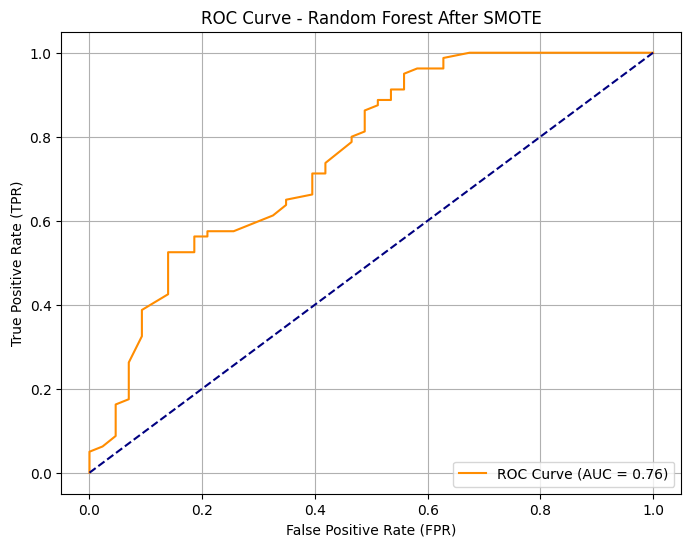

In [49]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--')  # baseline
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest After SMOTE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# XGBoost for Loan Approval Prediction

In [51]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train on SMOTE-balanced training data
xgb_model.fit(x_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [52]:
# Predict & Evaluate
# Make predictions on test data
xgb_pred = xgb_model.predict(x_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.7804878048780488
Confusion Matrix:
 [[24 19]
 [ 8 72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.56      0.64        43
           1       0.79      0.90      0.84        80

    accuracy                           0.78       123
   macro avg       0.77      0.73      0.74       123
weighted avg       0.78      0.78      0.77       123



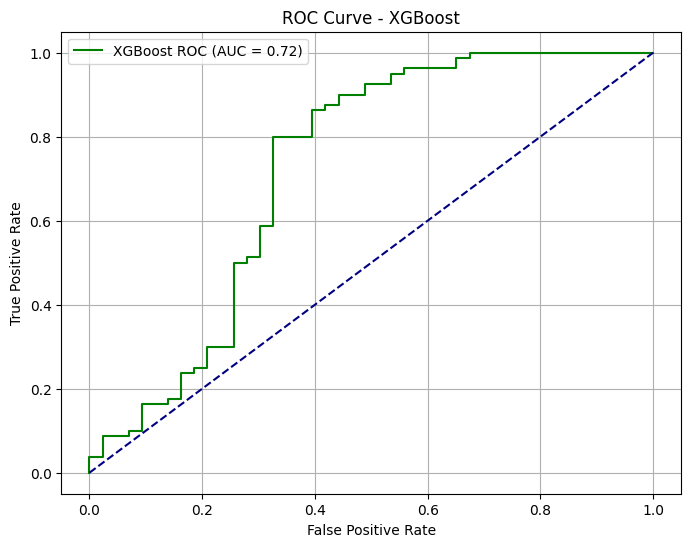

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilities for ROC curve
xgb_probs = xgb_model.predict_proba(x_test)[:, 1]

# Compute ROC metrics
fpr, tpr, _ = roc_curve(y_test, xgb_probs)
auc_score = roc_auc_score(y_test, xgb_probs)

# Plot ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', label=f'XGBoost ROC (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.show()


#  Save the XGBoost Model

In [54]:
import pickle

# Save model to file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

print(" Model saved as xgboost_model.pkl")

 Model saved as xgboost_model.pkl


# Feature Importance Plot (XGBoost)

<Figure size 1400x700 with 0 Axes>

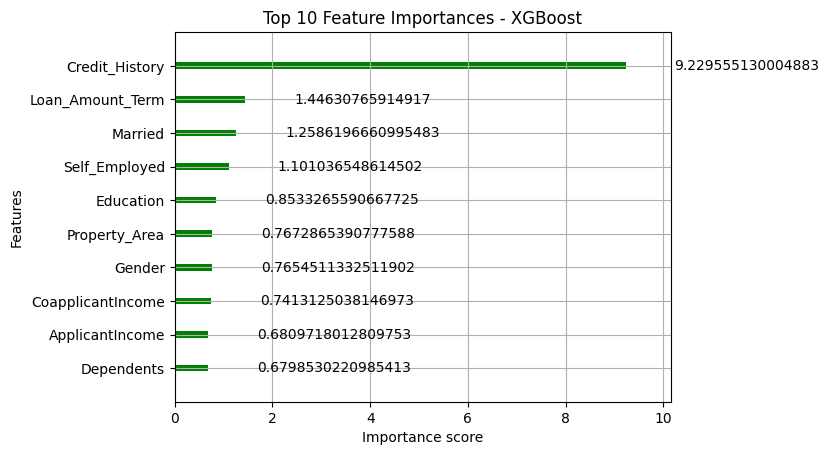

In [56]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plot_importance(xgb_model, importance_type='gain', max_num_features=10, color='green')
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()


In [57]:
import joblib
joblib.dump(model, 'xgb_model.pkl')  # Save model to file

['xgb_model.pkl']

# Conclusion

The Bank Loan Approval Prediction project successfully demonstrated the use 
of machine learning techniques to predict loan approval decisions based on 
applicant information such as income, credit history, and demographic details. 
Various models including Logistic Regression, Random Forest, and XGBoost were 
implemented and evaluated.

Among the tested models, XGBoost delivered strong performance with an accuracy 
of 78% and high recall for approved loan cases, making it suitable for 
minimizing false rejections of eligible applicants. Techniques like SMOTE were 
applied to handle class imbalance, improving the model’s ability to generalize.

This predictive system can assist financial institutions in making faster and 
more accurate loan decisions, reducing manual workload and potential bias. 
With further optimization and integration into banking workflows, the model 
could enhance efficiency, risk management, and customer satisfaction.

